<a href="https://colab.research.google.com/github/harshithballa/my_basic_cnn/blob/master/IncV1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Concatenate, concatenate, Conv2D, MaxPool2D, Flatten, Dense,Dropout

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "saiharshithballa" # username from the json file
os.environ['KAGGLE_KEY'] = "af59683427faf75d958a5cd12410630c" # key from the json file
!kaggle datasets download -d alessiocorrado99/animals10 # api copied from kaggle   


animals10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip animals10.zip

sheep


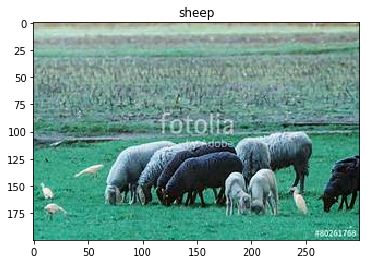

horse


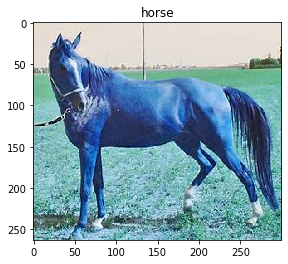

spider


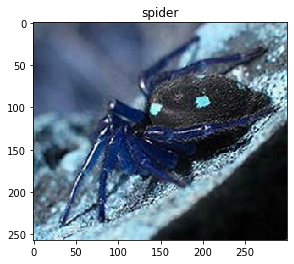

butterfly


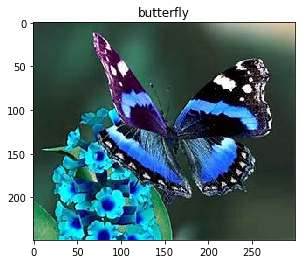

dog


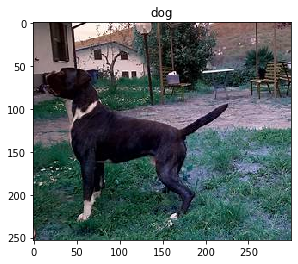

chicken


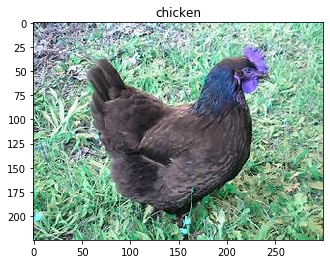

squirrel


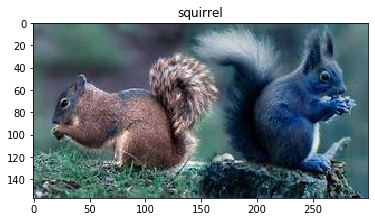

cow


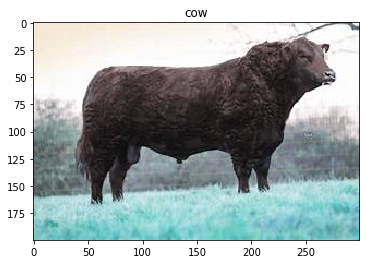

elephant


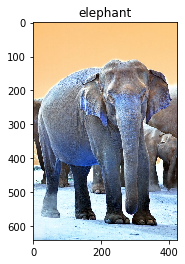

cat


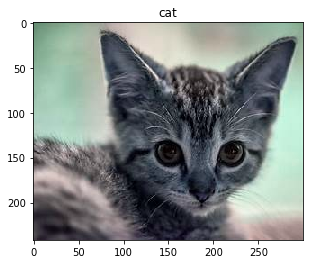

In [0]:
#get_ipython().__class__.__name__ = "ZMQInteractiveShell"
#from IPython.display import Image, display

import matplotlib.pyplot as plt
import cv2

for folder in os.listdir('/content/animals/raw-img'):
  if folder == 'elefante':
    os.rename(os.path.join('/content/animals/raw-img',folder),os.path.join('/content/animals/raw-img/','elephant'))
  elif folder == 'farfalla':
    os.rename(os.path.join('/content/animals/raw-img',folder),os.path.join('/content/animals/raw-img/','butterfly'))
  elif folder == 'gallina':
    os.rename(os.path.join('/content/animals/raw-img',folder),os.path.join('/content/animals/raw-img/','chicken'))
  elif folder == 'gatto':
    os.rename(os.path.join('/content/animals/raw-img',folder),os.path.join('/content/animals/raw-img/','cat'))
  elif folder == 'cavallo':
    os.rename(os.path.join('/content/animals/raw-img',folder),os.path.join('/content/animals/raw-img/','horse'))
  elif folder == 'scoiattolo':
    os.rename(os.path.join('/content/animals/raw-img',folder),os.path.join('/content/animals/raw-img/','squirrel'))
  elif folder == 'ragno':
    os.rename(os.path.join('/content/animals/raw-img',folder),os.path.join('/content/animals/raw-img/','spider'))
  elif folder == 'mucca':
    os.rename(os.path.join('/content/animals/raw-img',folder),os.path.join('/content/animals/raw-img/','cow'))
  elif folder == 'pecora':
    os.rename(os.path.join('/content/animals/raw-img',folder),os.path.join('/content/animals/raw-img/','sheep'))
  elif folder == 'cane':
    os.rename(os.path.join('/content/animals/raw-img',folder),os.path.join('/content/animals/raw-img/','dog'))


for folder in os.listdir('/content/animals/raw-img'):    
  for file in os.listdir(os.path.join('/content/animals/raw-img',folder)):
    print(folder)
    image = cv2.imread(os.path.join('/content/animals/raw-img/',folder,file))
    #display(Image(file,height = 256, width = 256))
    plt.imshow(image)
    plt.title(folder)
    plt.show()
    break

  

In [0]:
#!rm -r '/content/animals/'

In [0]:
from matplotlib.pyplot import imread
for folder in os.listdir('/content/animals/raw-img'):    
  for file in os.listdir(os.path.join('/content/animals/raw-img',folder)):
    img = imread(os.path.join('/content/animals/raw-img',folder,file))
    print(img.shape)
    break

(200, 300, 3)
(263, 300, 3)
(257, 300, 3)
(249, 300, 3)
(253, 300, 3)
(225, 300, 3)
(157, 300, 3)
(200, 300, 3)
(640, 425, 3)
(242, 300, 3)


In [0]:
inputs = Input(shape = (128,128,3))

layer0 = Conv2D(64,(7,7),strides= (2,2), padding = 'same', activation = 'relu')(inputs)
layer1 = MaxPool2D((3,3),strides=(2,2),padding = 'same')(layer0)
layer1 = Conv2D(64,(3,3), strides = (1,1), padding='same', activation = 'relu')(layer1)
layer1 = Conv2D(64,(3,3), strides = (1,1), padding ='same', activation = 'relu')(layer1)
layer1 = MaxPool2D((3,3),strides=(2,2),padding = 'same')(layer1)


layer2a = Conv2D(64,(1,1), strides = (1,1), padding = 'same', activation ='relu')(layer1)
layer2b = Conv2D(64,(1,1), strides = (1,1), padding = 'same', activation ='relu')(layer1)
layer2c = Conv2D(64,(1,1), strides = (1,1), padding = 'same', activation ='relu')(layer1)
layer2d = MaxPool2D((2,2), strides = (1,1), padding='same')(layer1)

layer3b = Conv2D(64,(3,3), strides = (1,1), padding = 'same', activation ='relu')(layer2b)
layer3c = Conv2D(64,(5,5), strides = (1,1), padding = 'same', activation ='relu')(layer2c)
layer3d = Conv2D(64,(1,1), strides = (1,1), padding = 'same', activation ='relu')(layer2d)

comb = concatenate([layer2a, layer3b, layer3c, layer3d], axis=1)

layer4 = Conv2D(64,(2,2), strides = (1,1), padding = 'same', activation= 'relu')(comb)
layer5 = MaxPool2D((2,2), strides =(1,1), padding ='same')(layer4)

layer6 = Flatten()(layer5)

layer7 = Dense(128, activation = 'relu')(layer6)
layer8 = Dropout(0.4)(layer7)
layer9 = Dense(10, activation = 'softmax')(layer8)




In [0]:
model = Model(inputs = inputs, outputs = layer9)

In [0]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 64, 64, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 32, 32, 64)   0           conv2d_9[0][0]                   
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 32, 32, 64)   36928       max_pooling2d_2[0][0]            
____________________________________________________________________________________________

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range =0.2,
                             horizontal_flip = True,
                             shear_range =0.2,
                             rotation_range = 20)

train_data = datagen.flow_from_directory('/content/animals/raw-img',
                                         target_size = (128,128),
                                         batch_size = 32,
                                         class_mode = 'categorical')



Found 28266 images belonging to 10 classes.


In [0]:
model.fit_generator(train_data,
                    epochs = 10)

Epoch 1/10
884/884 [==============================] - 168s 190ms/step - loss: 2.9252 - acc: 0.1761
Epoch 2/10
884/884 [==============================] - 165s 187ms/step - loss: 2.2172 - acc: 0.1809
Epoch 3/10
884/884 [==============================] - 166s 188ms/step - loss: 2.2152 - acc: 0.1816
Epoch 4/10
884/884 [==============================] - 164s 186ms/step - loss: 2.4551 - acc: 0.1836
Epoch 5/10
884/884 [==============================] - 164s 185ms/step - loss: 2.2141 - acc: 0.1804
Epoch 6/10
884/884 [==============================] - 165s 186ms/step - loss: 2.2203 - acc: 0.1822
Epoch 7/10
884/884 [==============================] - 164s 185ms/step - loss: 2.2151 - acc: 0.1816
Epoch 8/10
884/884 [==============================] - 164s 186ms/step - loss: 2.2152 - acc: 0.1816
Epoch 9/10
884/884 [==============================] - 163s 185ms/step - loss: 2.2152 - acc: 0.1816
Epoch 10/10
884/884 [==============================] - 164s 185ms/step - loss: 2.2152 - acc: 0.1816
